# Regression

In [71]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import datetime

plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Preprocessing Input data
data = pd.read_csv('housing_in_city_of_london.csv')
date = data.loc[:,'date']
data['converted_date'] = ''

# Get proleptic Gregorian ordinals of dates
separated_date = date.str.split('/', n = 2, expand = True)
year = separated_date[0]
month = separated_date[1]
day = separated_date[2]

for i in range(len(separated_date)):
    date1 = datetime.date(int(year[i]), int(month[i]), int(day[i]))
    date2 = date1.toordinal()
    data.loc[i,'converted_date'] = date2
    
# Set X & Y values
X = data.loc[:,'converted_date']
Y = data.loc[:,'average_price']
print(Y)

0       91449
1       82203
2       79121
3       77101
4       84409
        ...  
296    792034
297    827093
298    777610
299    734872
300    775309
Name: average_price, Length: 301, dtype: int64


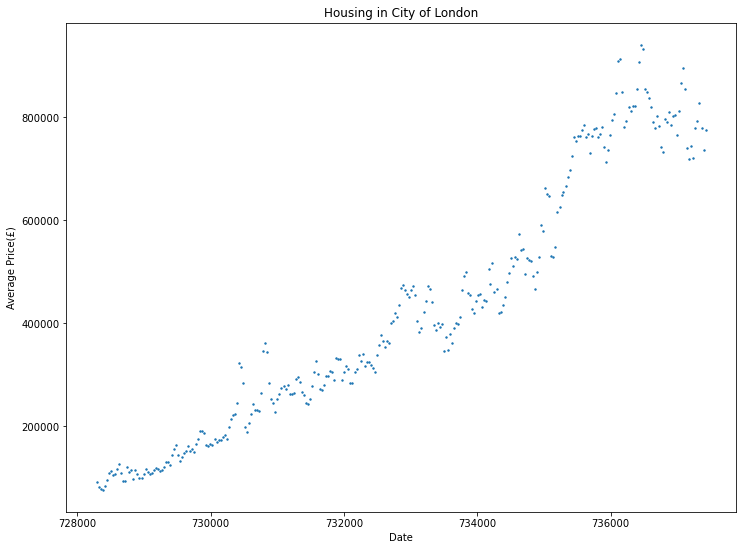

In [72]:
values = [1995, 2000, 2005, 2010, 2015, 2020] 

plt.xlabel('Date')
plt.ylabel('Average Price(£)')
plt.title("Housing in City of London")

plt.scatter(X, Y,s = 2)
plt.show()

Applying linear regression to this like in the previous cas will give:

63994.54533132088
0.929818000938929


C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/1754256332.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x1 = X[:, np.newaxis]
C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/1754256332.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = Y[:, np.newaxis]


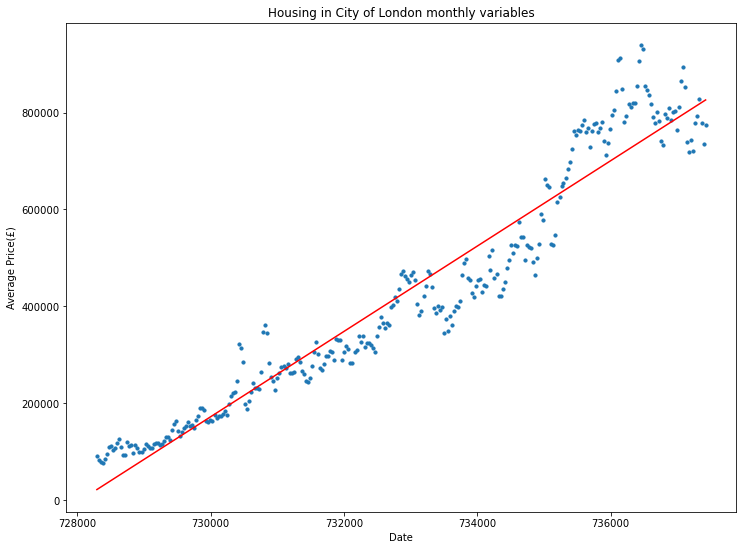

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# transforming the data to include another axis
x1 = X[:, np.newaxis]
y1 = Y[:, np.newaxis]

model = LinearRegression()
model.fit(x1, y1)
y_pred = model.predict(x1)

rmse = np.sqrt(mean_squared_error(y1,y_pred))
r2 = r2_score(y1,y_pred)
print(rmse)
print(r2)

plt.xlabel('Date')
plt.ylabel('Average Price(£)')
plt.title("Housing in City of London monthly variables")

plt.scatter(x1, y1, s=10)
plt.plot(x1, y_pred, color='r')
plt.show()

C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/3322250120.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x2 = X[:, np.newaxis]
C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/3322250120.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y2 = Y[:, np.newaxis]


56007.82465463782
0.9462427271140902


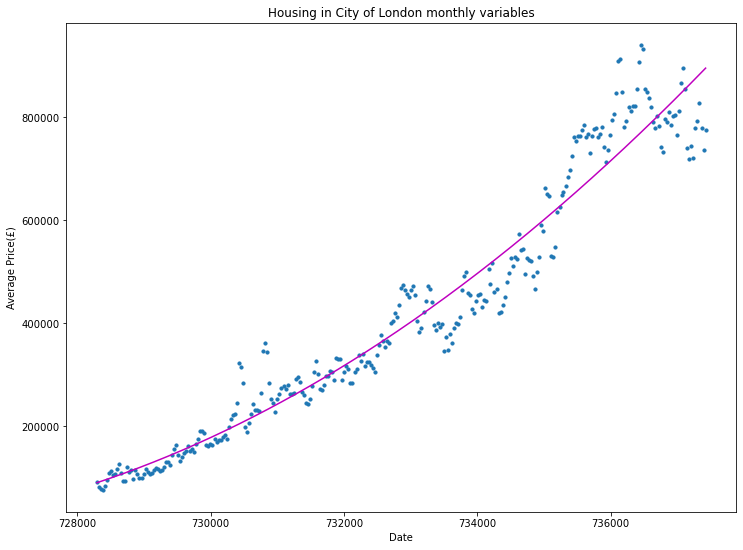

In [74]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x2 = X[:, np.newaxis]
y2 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2) # A fit of polynomial degree 2
x_poly = polynomial_features.fit_transform(x2)

model = LinearRegression()
model.fit(x_poly, y2)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y2,y_poly_pred))
r2 = r2_score(y2,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y_poly_pred), key=sort_axis)
x2, y_poly_pred = zip(*sorted_zip)

plt.xlabel('Date')
plt.ylabel('Average Price(£)')
plt.title("Housing in City of London monthly variables")

plt.plot(x2, y_poly_pred, color='m')
plt.show()


Much better, but let's see if it could still be promoted.

C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/1130229028.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x3 = X[:, np.newaxis]
C:\Users\BLACkkkkk\AppData\Local\Temp/ipykernel_15400/1130229028.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y3 = Y[:, np.newaxis]


56011.43449258863
0.9462357973217389


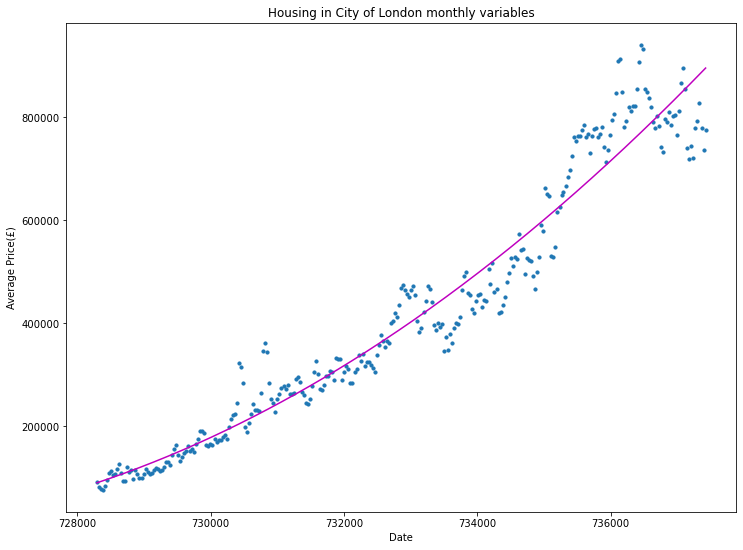

In [75]:
# transforming the data to include another axis
x3 = X[:, np.newaxis]
y3 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3) # A fit of polynomial degree 3
x_poly = polynomial_features.fit_transform(x3)

model = LinearRegression()
model.fit(x_poly, y3)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y3,y_poly_pred))
r2 = r2_score(y3,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x3, y3, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x3,y_poly_pred), key=sort_axis)
x3, y_poly_pred = zip(*sorted_zip)

plt.xlabel('Date')
plt.ylabel('Average Price(£)')
plt.title("Housing in City of London monthly variables")

plt.plot(x3, y_poly_pred, color='m')
plt.show()



It seems worse, so degree = 2 is the most appropriate.

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

---
# Clustering

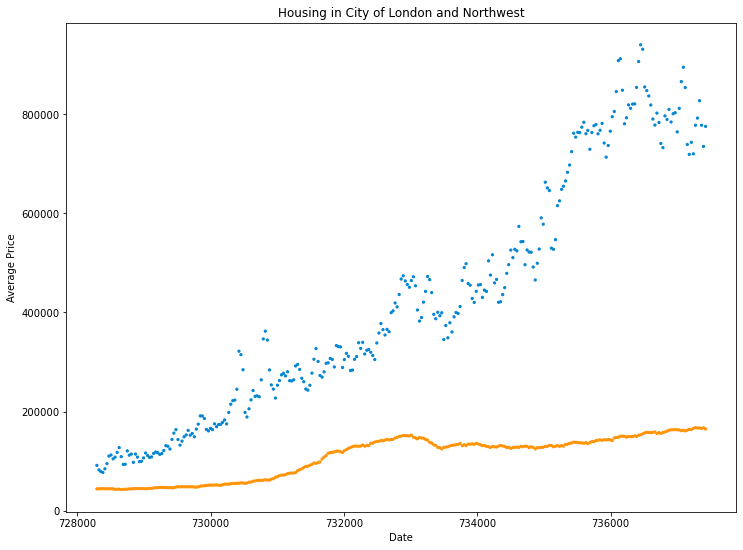

In [76]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
import pandas as pd

# Import data
data = pd.read_csv('housing_in_city_of_london_and_northwest.csv')
date = data.loc[:,'date']
data['converted_date'] = ''
colors = []

# Get proleptic Gregorian ordinals of dates
separated_date = date.str.split('/', n = 2, expand = True)
year = separated_date[0]
month = separated_date[1]
day = separated_date[2]

for i in range(len(data)):
    date1 = datetime.date(int(year[i]), int(month[i]), int(day[i]))
    date2 = date1.toordinal()
    data.loc[i,'converted_date'] = date2
    if data.loc[i,'area'] == 'city of london':
        colors.append('#0485d1')
    else:
        colors.append('#ff9408')

# Set X & Y values
X = data.loc[:,'converted_date']
Y = data.loc[:,'average_price']

# show the plot
pyplot.xlabel('Date')
pyplot.ylabel('Average Price')
pyplot.title("Housing in City of London and Northwest")
pyplot.scatter(X, Y, c = colors, s = 5)
pyplot.show()

This chart shows house prices in City of London (blue) and the Northwest (Orange) from 1995 to 2020.

F:\Anaconda\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(


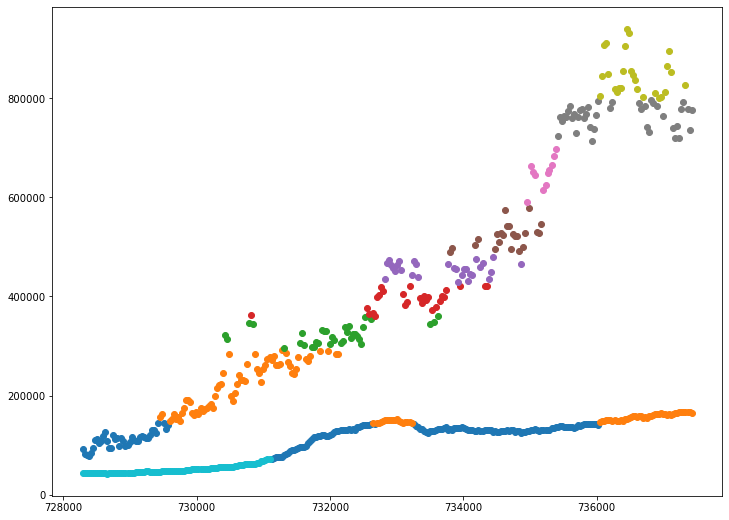

In [77]:
# affinity propagation clustering
from numpy import unique
from sklearn.cluster import AffinityPropagation
import pandas as pd

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = AffinityPropagation(damping=0.9)

# fit the model
model.fit(array)

# assign a cluster to each example
yhat = model.predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
    
# show the plot
pyplot.show()

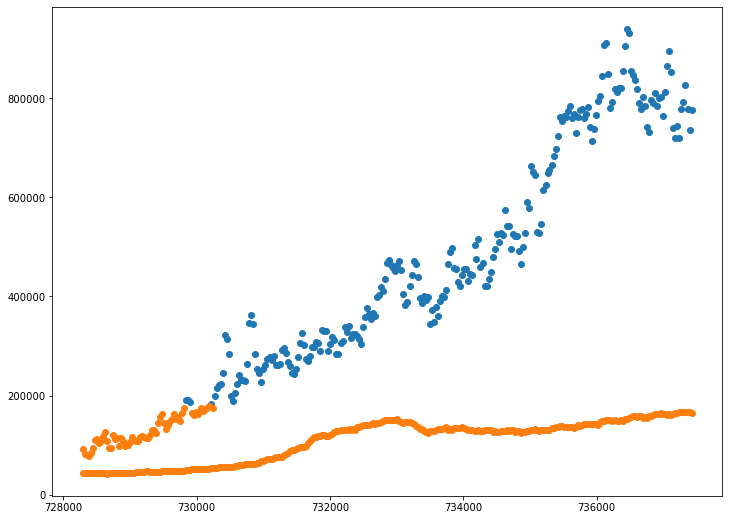

In [78]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = AgglomerativeClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(array)
# retrieve unique clusters

clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

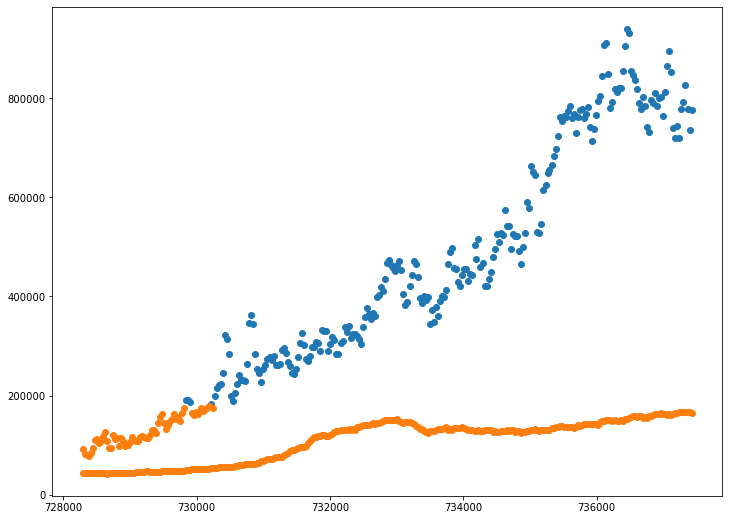

In [79]:
# birch clustering
from sklearn.cluster import Birch

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = Birch(threshold=0.01, n_clusters=2)

# fit the model
model.fit(array)

# assign a cluster to each example
yhat = model.predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

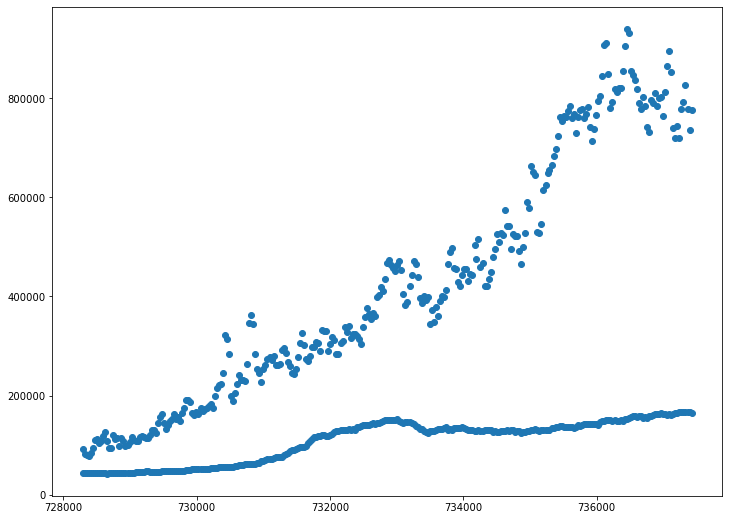

In [80]:
# dbscan clustering
from sklearn.cluster import DBSCAN

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = DBSCAN(eps=0.30, min_samples=9)

# fit model and predict clusters
yhat = model.fit_predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

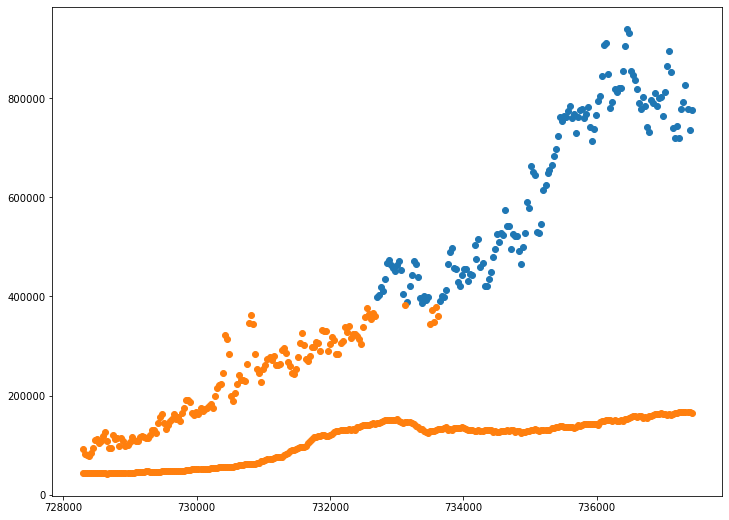

In [81]:
# k-means clustering
from sklearn.cluster import KMeans

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = KMeans(n_clusters=2)

# fit the model
model.fit(array)

# assign a cluster to each example
yhat = model.predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

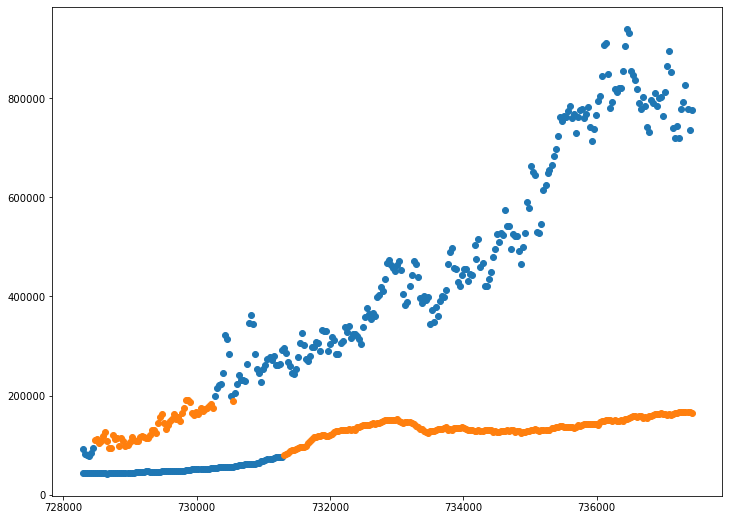

In [82]:
# optics clustering
from sklearn.cluster import OPTICS

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = OPTICS(eps=0.8, min_samples=100)

# fit model and predict clusters
yhat = model.fit_predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

F:\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


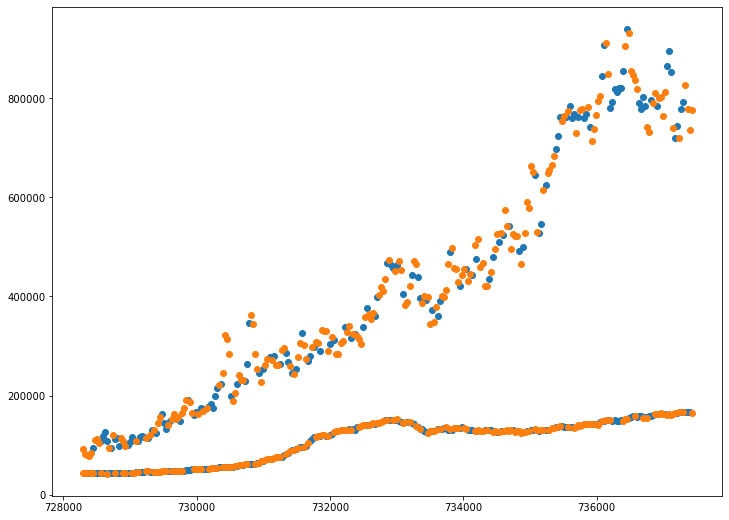

In [83]:
# spectral clustering
from sklearn.cluster import SpectralClustering

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = SpectralClustering(n_clusters=2)

# fit model and predict clusters
yhat = model.fit_predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

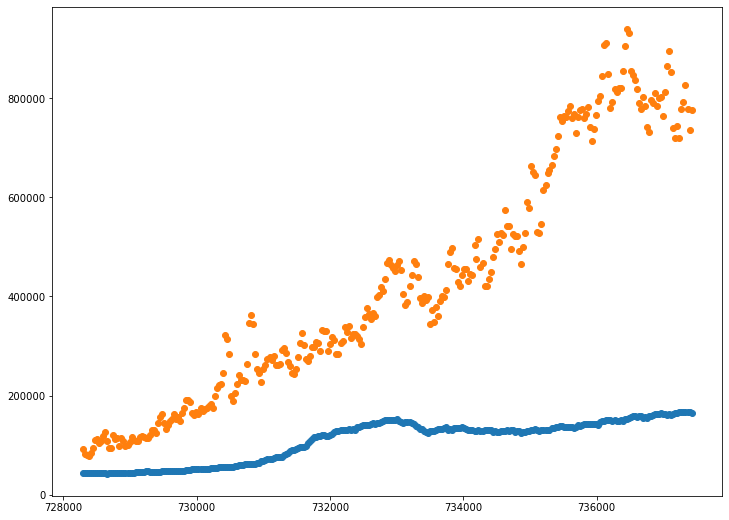

In [84]:
# gaussian mixture clustering
from sklearn.mixture import GaussianMixture

# define dataset
array = data[['converted_date', 'average_price']].to_numpy()

# define the model
model = GaussianMixture(n_components=2)

# fit the model
model.fit(array)

# assign a cluster to each example
yhat = model.predict(array)

# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(array[row_ix, 0], array[row_ix, 1])
# show the plot
pyplot.show()

Gaussian mixture clustering seems to work best.

---
# Self Organising Maps

Example: https://miro.romanvlahovic.com/2019/10/14/voids-brands-characters-and-how-to-deal-with-lots/

Introduced by __Teuvo Kohonen__ in 1982

Unsupervised learning method, specifically Competitive Learning. 

A training set X. And a map SOM. The SOM consists of a grid with weights. 

Algorithm:
- Initialise SOM with random grid weights
- Repeat following until convergance or maximum epochs
    - Shuffle training examples
    - For each training instance x
        - Find BMU in SOM
        - Update neighbourhood of BMU to draw closer to weights of x. 


_source: https://stackabuse.com/self-organizing-maps-theory-and-implementation-in-python-with-numpy/_

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for i in train_data:
            for train_ex in i:
                g, h = find_BMU(SOM, train_ex)
                SOM = update_weights(SOM, train_ex, 
                                     learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

In [87]:
# read the image
img = plt.imread('heatmap.jpg')
print(img.shape)

(1014, 1560, 3)


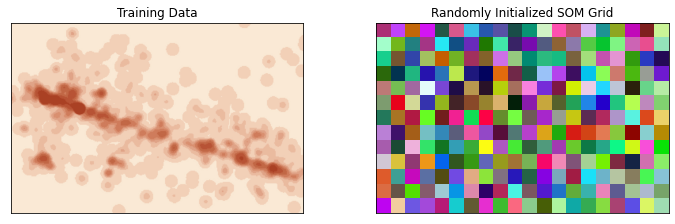

In [88]:
# Dimensions of the SOM grid
m = 13
n = 20
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = img
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.astype(int))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

KeyboardInterrupt: 

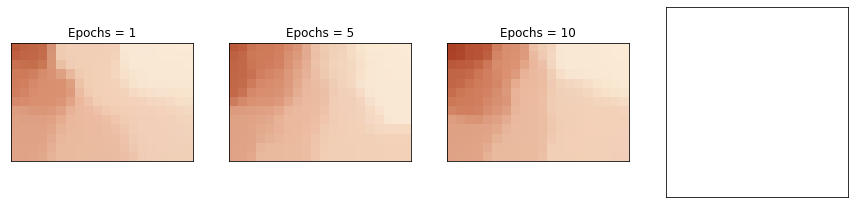

In [89]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('Epochs = ' + str(total_epochs))

Using SOM to transform the heat map in our project based on a 20*13 grid.

The code seems to be fine, except that it takes an extraordinarily long time to run so I had to break him, or is there something wrong with my code?